# ML Workflow - Error evaluation (Regression)

![Image](./img/scikit_learn.png)

In [ ]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Housing dataset

housing = datasets.fetch_california_housing(as_frame=True)
description = housing.DESCR

housing = housing['data'].merge(housing['target'], left_index=True, right_index=True)
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
print(description)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

---

In [ ]:
# Load datasets for ML

X, y = datasets.fetch_california_housing(return_X_y=True)
#X, y = make_regression(n_samples=1000, n_features=10, random_state=42)

print(X.shape, y.shape)

(20640, 8) (20640,)


In [ ]:
# Create train and test (validation) samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (16512, 8), X_test: (4128, 8), y_train: (16512,), y_test: (4128,)


In [ ]:
%%time

# Train the model and make predictions

regressor = LinearRegression()
#regressor = RandomForestRegressor()
hyperparameters = regressor.get_params()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Model:', regressor, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
print('Ground truth target:', y_test, '\n')
print('Predicted target:', y_pred, '\n')

Model: LinearRegression() 

Model hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 

Ground truth target: [0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ] 

Predicted target: [0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251] 

Wall time: 298 ms


---

## [Error evaluation (Regression)](https://scikit-learn.org/stable/modules/model_evaluation.html)

![Image](./img/error_regression.jpeg)

### MSE (Mean Square Error)

Mean Square Error measures the average squared difference between the estimated values and the actual value. 

__Potential problems:__ Very sensitive to outliers.

![Image](./img/mse.JPG)

In [ ]:
# MSE calculation

mean_squared_error(y_test, y_pred) # no se usa mucho, pq es sensible a los outliers y, sobre todo, pq está al cuadrado

0.555891598695242

__Interpretation:__ The smaller the mean squared error, the closer you are to finding the best fit.

---

### RMSE (Root Mean Square Error)

Root Mean Squared Error is just the square root of the mean square error. It is preferred over MSE because it the most easily interpreted statistic since it has the same units as the target. It is the standard deviation of the residuals (prediction errors).

__Potential problems:__ It gives a relatively high weight to large errors.

![Image](./img/rmse.JPG)

In [ ]:
# RMSE calculation --> cuanto mas cercano a 0 mejor

rmse = mean_squared_error(y_test, y_pred)**0.5
rmse

0.7455813830127748

In [ ]:
"""nos estamos desviando 75.000 dolares"""

'nos estamos desviando 75.000 dolares'

__Interpretation:__ The smaller the mean squared error, the closer you are to finding the best fit. This is the one used by Kaggle!!!

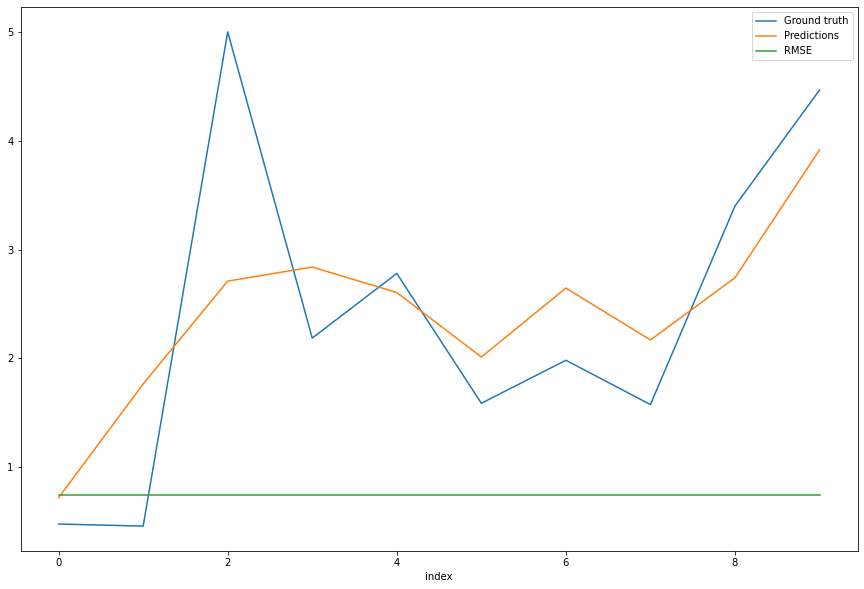

In [ ]:
# Visual analysis

check = pd.DataFrame({'Ground truth':y_test[:10],
                      'Predictions':y_pred[:10], 
                      'RMSE':rmse})
check.reset_index(inplace=True)
check.plot(x='index',
           y=['Ground truth', 'Predictions', 'RMSE'], 
           kind='line', 
           figsize=(15, 10));

---

### R2 (R-squared)

R-squared is a statistical measure that represents what proportion of the variance for a dependent variable is explained by the independent variables (e.g.: an r-squared of 60% reveals that 60% of the data fit the regression model).

__Potential problems:__ R-squared always increases with any new feature addition which means that it’s difficult to identify if the model did better with lesser features.

![Image](./img/r2.JPG)

In [ ]:
# R2 calculation

r2 = r2_score(y_test, y_pred)
r2

0.5757877060324526

In [ ]:
# Another way

r2_ = regressor.score(X_test, y_test)
r2_

0.5757877060324526

__Interpretation:__ R-squared rank from 0 to 100% (i.e.: from 0 to 1), where 0 means that 0% of the data fit the regression model and 1 means that 100% of the data fit the regression model.

---